In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df=pd.read_csv("/content/spam.csv", encoding='ISO-8859-1') # read the data with encoding since there are special or latin characters
df.head(20) # check head

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df=df.iloc[:,[0,1]] # drop the last two na columns which are not useful for our task too
df.head(10)
df.columns = ['Spam or Ham','Text'] # rename columns
df.head()

,Spam or Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df. describe()

,Spam or Ham,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spam or Ham  5572 non-null   object
 1   Text         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<ipython-input-6-f621b3b2760b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=df["Spam or Ham"], palette=cols, edgecolor="black")


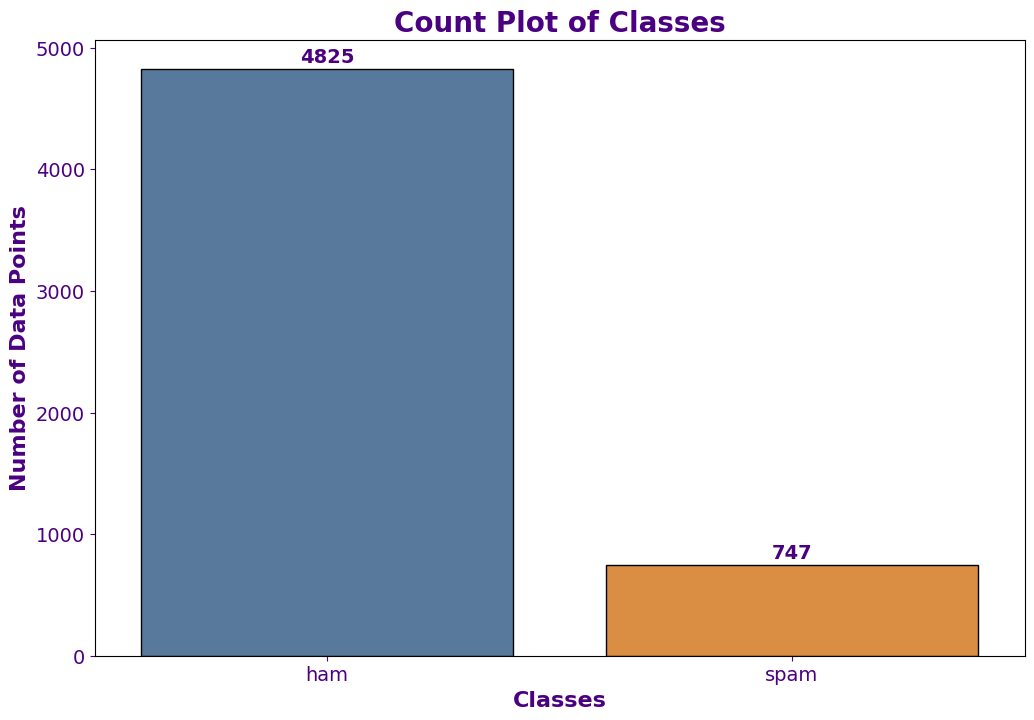

In [6]:
# Define a new color palette
cols = ["#4E79A7", "#F28E2B"]  # Blue and orange colors

# Evaluate the target and find out if our data is balanced
plt.figure(figsize=(12, 8))

# Create the count plot
fg = sns.countplot(x=df["Spam or Ham"], palette=cols, edgecolor="black")

# Set the title and labels
fg.set_title("Count Plot of Classes", color="#4B0082", fontsize=20, fontweight='bold')
fg.set_xlabel("Classes", color="#4B0082", fontsize=16, fontweight='bold')
fg.set_ylabel("Number of Data Points", color="#4B0082", fontsize=16, fontweight='bold')

# Customize the tick parameters for better readability
fg.tick_params(axis='x', colors='#4B0082', labelsize=14)
fg.tick_params(axis='y', colors='#4B0082', labelsize=14)

# Add value labels on the bars
for p in fg.patches:
    fg.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                color="#4B0082", fontsize=14, fontweight='bold')

# Show the plot
plt.show()


<ipython-input-7-6f1e999a7cb2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')


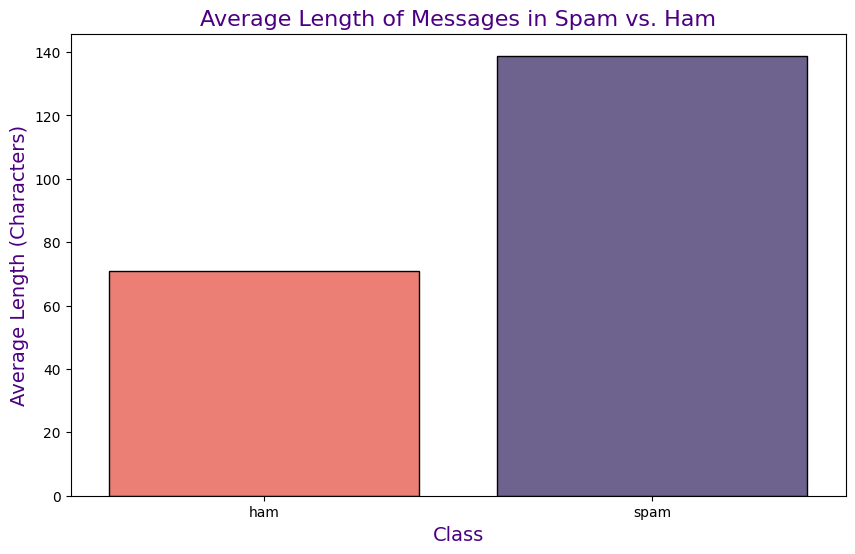

In [7]:
# Set the color palette
palette = ["#FF6F61", "#6B5B95"]

# Add a column for the length of the text
df['Text_Length'] = df['Text'].apply(len)

# Calculate the average length of messages per class
average_length = df.groupby('Spam or Ham')['Text_Length'].mean().reset_index()

# Plot the average length of messages
plt.figure(figsize=(10, 6))
sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')
plt.title('Average Length of Messages in Spam vs. Ham', fontsize=16, color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Average Length (Characters)', fontsize=14, color='#4B0082')
plt.show()

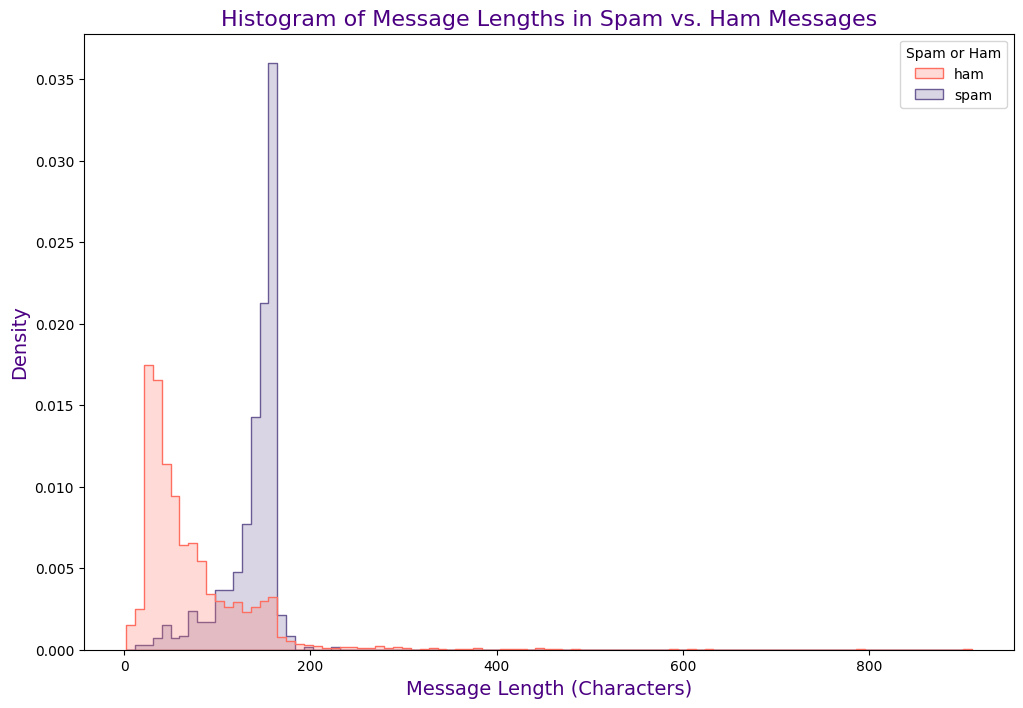

In [8]:
# Plot histogram
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Text_Length', hue='Spam or Ham', palette=palette, element='step', stat='density', common_norm=False)
plt.title('Histogram of Message Lengths in Spam vs. Ham Messages', fontsize=16, color='#4B0082')
plt.xlabel('Message Length (Characters)', fontsize=14, color='#4B0082')
plt.ylabel('Density', fontsize=14, color='#4B0082')
plt.show()

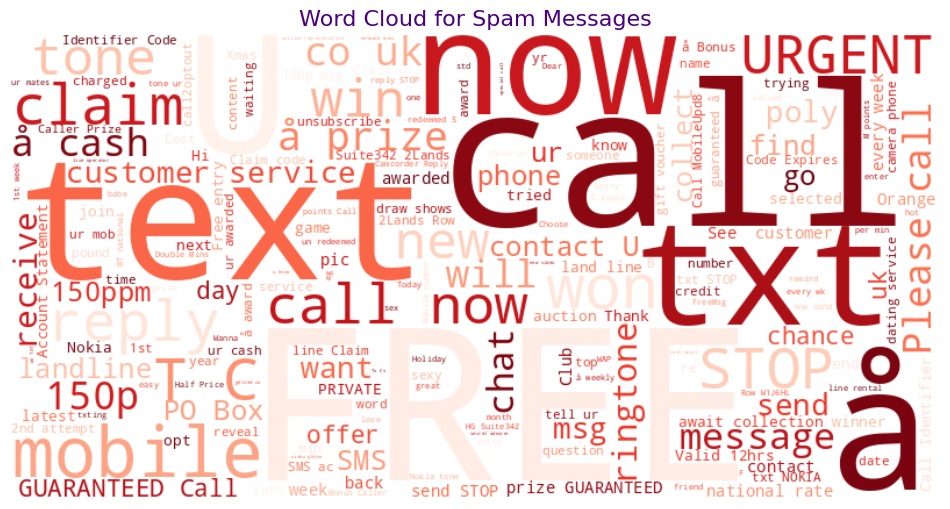

In [9]:
from wordcloud import WordCloud

# Filter spam messages
spam_texts = ' '.join(df[df['Spam or Ham'] == 'spam']['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#4B0082')
plt.show()

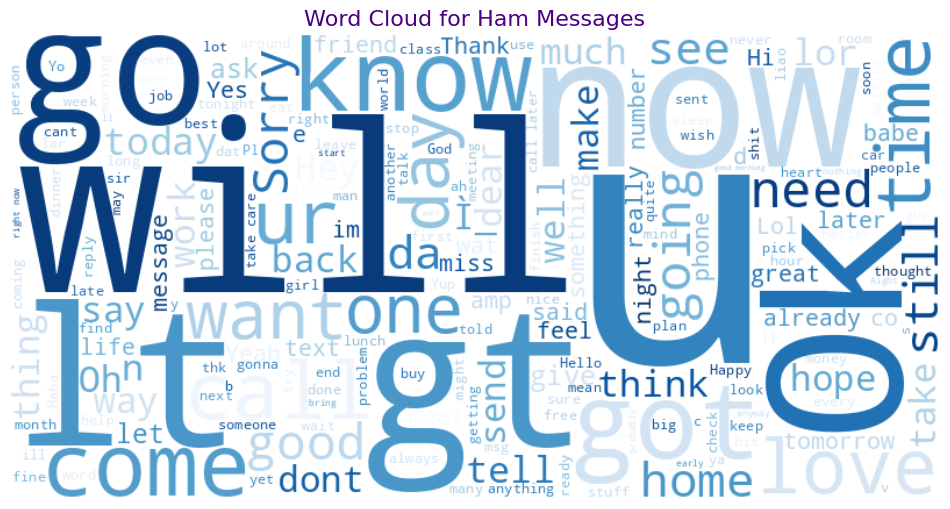

In [10]:
# Filter ham messages
ham_texts = ' '.join(df[df['Spam or Ham'] == 'ham']['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='#4B0082')
plt.show()

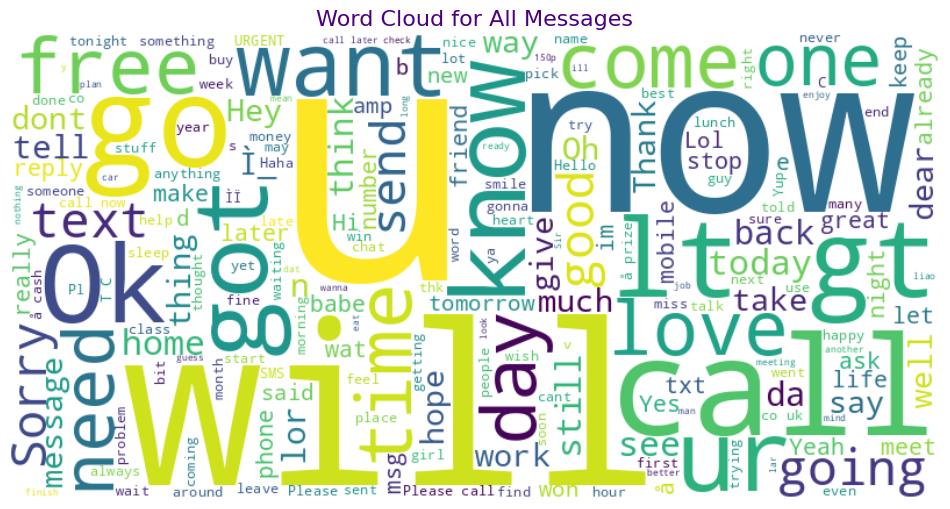

In [11]:
# Combine all text messages
all_texts = ' '.join(df['Text'])

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Messages', fontsize=16, color='#4B0082')
plt.show()

<ipython-input-12-2e62f8000419>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spam or Ham', data=df, palette=['#E1F16B', '#E598D8'])


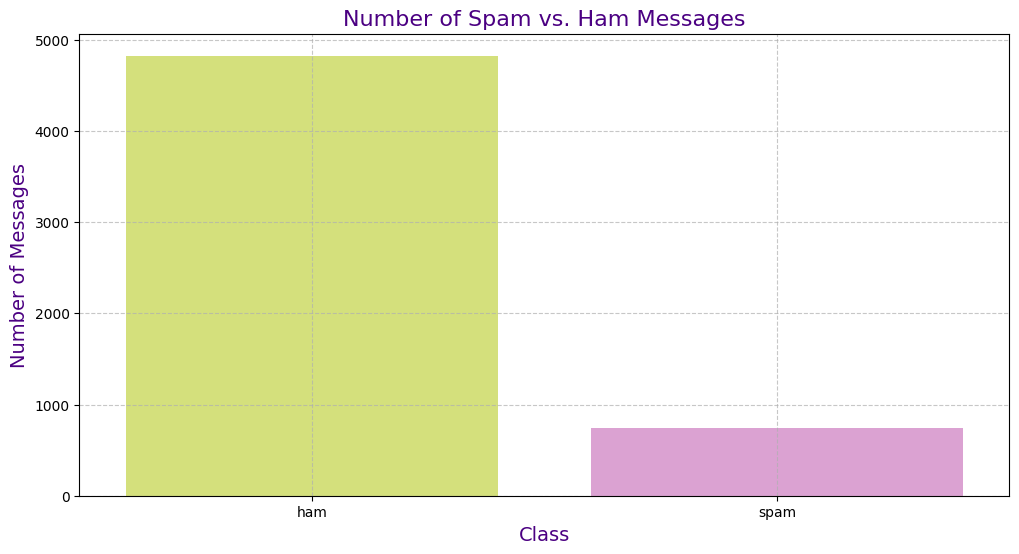

In [12]:
# Plot the count of messages in each class
plt.figure(figsize=(12, 6))
sns.countplot(x='Spam or Ham', data=df, palette=['#E1F16B', '#E598D8'])
plt.title('Number of Spam vs. Ham Messages', fontsize=16, color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Number of Messages', fontsize=14, color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-13-b199cfbdf1ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Spam or Ham', y='Text_Length', data=df, palette=['#E1F16B', '#E598D8'])


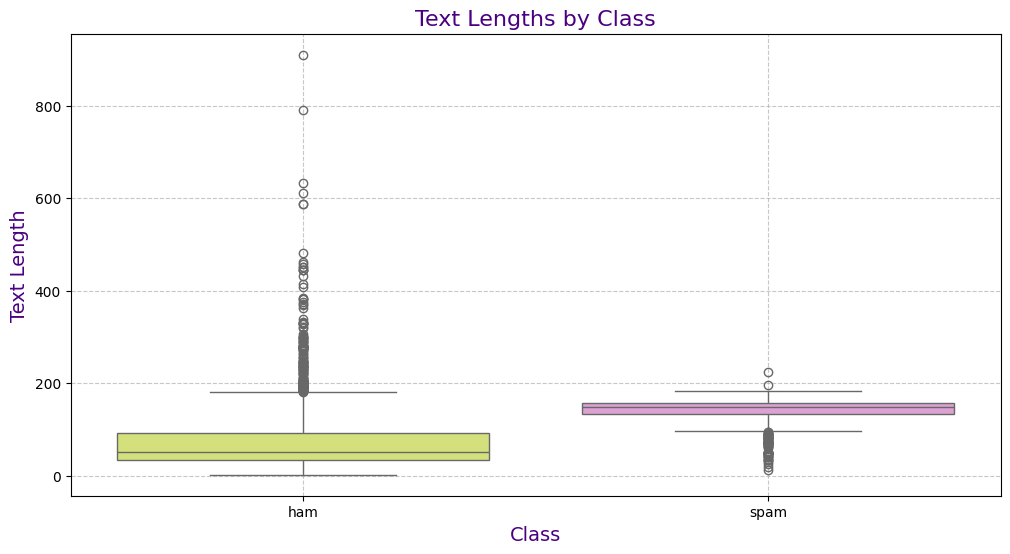

In [13]:
# Plot the distribution of text lengths by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Spam or Ham', y='Text_Length', data=df, palette=['#E1F16B', '#E598D8'])
plt.title('Text Lengths by Class', fontsize=16, color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Text Length', fontsize=14, color='#4B0082')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Display basic statistics
text_stats = df.groupby('Spam or Ham').agg({'Text_Length': ['mean', 'std', 'min', 'max', 'median', 'count']})
text_stats.columns = ['Mean Length', 'Std Dev Length', 'Min Length', 'Max Length', 'Median Length', 'Count']
text_stats.style.background_gradient(cmap='viridis').set_caption('Text Length Statistics by Class')

,Mean Length,Std Dev Length,Min Length,Max Length,Median Length,Count
Spam or Ham,,,,,,
ham,71.023627,58.016023,2,910,52.000000,4825
spam,138.866131,29.183082,13,224,149.000000,747


In [15]:


X = df['Text']  # Use 'Text' column as the feature
y = df['Spam or Ham']  # Use 'Spam or Ham' column as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", len(X_train))
print("Test data size:", len(X_test))


Training data size: 4457
Test data size: 1115


In [16]:


# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Vectorize the text
    ('clf', MultinomialNB())  # Use a Multinomial Naive Bayes classifier
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9623318385650225
Precision: 1.0
Recall: 0.72
F1 Score: 0.8372093023255813


In [17]:

# Train a Random Forest classifier
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='spam')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='spam')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='spam')

# Train a KNN classifier
pipeline_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='spam')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='spam')
f1_knn = f1_score(y_test, y_pred_knn, pos_label='spam')

# Train a SVM classifier
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='spam')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='spam')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='spam')

# Print the results
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

print("\nKNN:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

print("\nSVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Random Forest:
Accuracy: 0.9713004484304932
Precision: 1.0
Recall: 0.7866666666666666
F1 Score: 0.8805970149253731

KNN:
Accuracy: 0.915695067264574
Precision: 1.0
Recall: 0.37333333333333335
F1 Score: 0.5436893203883496

SVM:
Accuracy: 0.9820627802690582
Precision: 1.0
Recall: 0.8666666666666667
F1 Score: 0.9285714285714286


In [18]:


from sklearn.metrics import confusion_matrix

# Get confusion matrix for each model
cm_nb = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print confusion matrices
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

print("\nRandom Forest Confusion Matrix:")
print(cm_rf)

print("\nKNN Confusion Matrix:")
print(cm_knn)

print("\nSVM Confusion Matrix:")
print(cm_svm)


Naive Bayes Confusion Matrix:
[[965   0]
 [ 42 108]]

Random Forest Confusion Matrix:
[[965   0]
 [ 32 118]]

KNN Confusion Matrix:
[[965   0]
 [ 94  56]]

SVM Confusion Matrix:
[[965   0]
 [ 20 130]]


In [19]:
import random

# Select a random sample of 10 indices from the test data
random_indices = random.sample(range(len(X_test)), 10)

# Get the actual and predicted labels for the selected indices
actual_labels = y_test.iloc[random_indices]
predicted_labels = pipeline.predict(X_test.iloc[random_indices])

# Create a table to display the results
results = pd.DataFrame({
    'Actual Label': actual_labels,
    'Predicted Label': predicted_labels
})

# Print the table
print(results.to_string())


     Actual Label Predicted Label
501           ham             ham
4490          ham             ham
1084          ham             ham
2417          ham             ham
1425          ham             ham
1835          ham             ham
272          spam            spam
4051          ham             ham
4816          ham             ham
2377         spam             ham
